In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                ### Importing important Libraries.
import seaborn as sns                                                        
                                                                     
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import joblib



In [2]:
def load_and_preprocess_data(filepath):

    df = pd.read_csv(filepath)                   ## loading Dataset.

    print(df.info())                   ## Analysing  Data.
    print(df.describe())

    print("\nMissing Values(NULL values):\n", df.isnull().sum())     ### Checking presence of NULL values . if exist replace with 0.

    df["City"] = df["City"].astype('category').cat.codes                                    # Encode categorical variables
    df["Company"] = df["Company"].astype('category').cat.codes      


    ###  Feature Handling..  ###


    df['City_Company'] = (df['City'].astype(str) + "_" + df['Company'].astype(str)).astype('category').cat.codes

    POWER_WATTS = {
        'Fan': 75,
        'Refrigerator': 250,
        'AirConditioner': 1500,                                # Power ratings  (in watts) (According to Real World)
        'Television': 120,
        'Monitor': 50,
        'MotorPump': 1000
    }

    df['EstimatedPowerWatts'] = (
        df['Fan'] * POWER_WATTS['Fan'] +
        df['Refrigerator'] * POWER_WATTS['Refrigerator'] +
        df['AirConditioner'] * POWER_WATTS['AirConditioner'] +                          # Estimating total power usage.
        df['Television'] * POWER_WATTS['Television'] +
        df['Monitor'] * POWER_WATTS['Monitor'] +
        df['MotorPump'] * POWER_WATTS['MotorPump']
    )

    df['EstimatedEnergyKWh'] = (df['EstimatedPowerWatts'] * df['MonthlyHours']) / 1000           # Calculate Estimated Energy (in kWh) and Estimated Cost
    df['EstimatedCost'] = df['EstimatedEnergyKWh'] * df['TariffRate']
    df.drop('EstimatedPowerWatts', axis=1, inplace=True)

    return df


In [3]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, color='mediumblue', alpha=0.7)  
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Electricity Bill")                                                   ### Ploting Graph.
    plt.ylabel("Predicted Electricity Bill")
    plt.title("Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [4]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)                                      ## Training and evaluating.

    print(" RMSE : ", rmse)
    print(" R² Score : ", r2)

    plot_predictions(y_test, predictions)

    return model, rmse, r2


In [5]:
df = load_and_preprocess_data("electricity_bill_dataset.csv")           # Load and preprocess data


X = df.drop("ElectricityBill", axis=1)                                      # Defining input and output
y = df["ElectricityBill"]

X_train, X_test, y_train, y_test = train_test_split(                            # Train-Test & split
    X, y, test_size=0.2, random_state=42
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB
None
                Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.99069

 RMSE :  17.8315335445819
 R² Score :  0.99972094234728


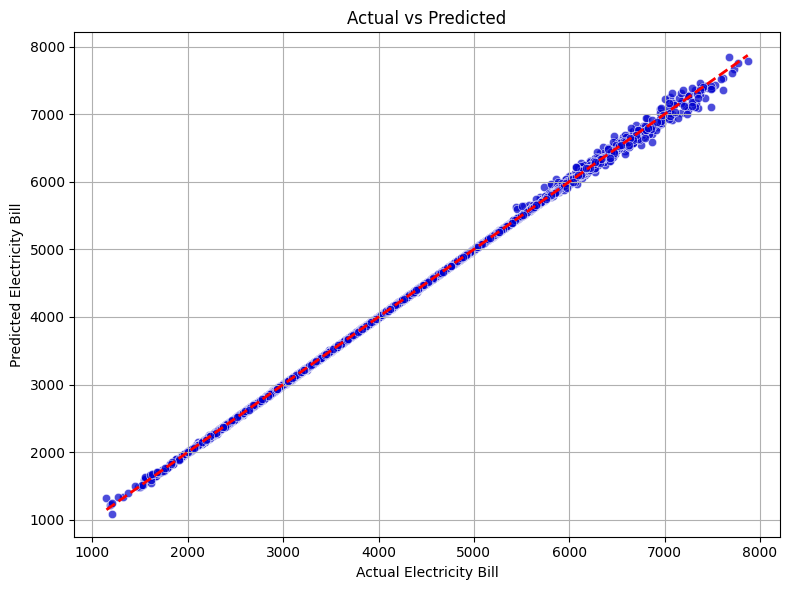

In [6]:
## Train and evaluating Random Forest model

rf_model = RandomForestRegressor(random_state=42)
_, rf_rmse, rf_r2 = train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)
